---
<font size="100">**Technical Analysis**</font>

---

# Importing necessary modules and libraries

In [1]:
import plotly.express as px
import numpy as np
import pandas as pd
import ta
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings('ignore')

---
# Loading **Alphabet Inc Class A (GOOGL) stock** data

In [3]:
# We have used the data from last 4 years (so that there are no NaN values in the indicator values, exactly from 3 years ago)
closing_price = pd.read_csv('GOOGL.csv')
closing_price.Date = pd.to_datetime(closing_price.Date)

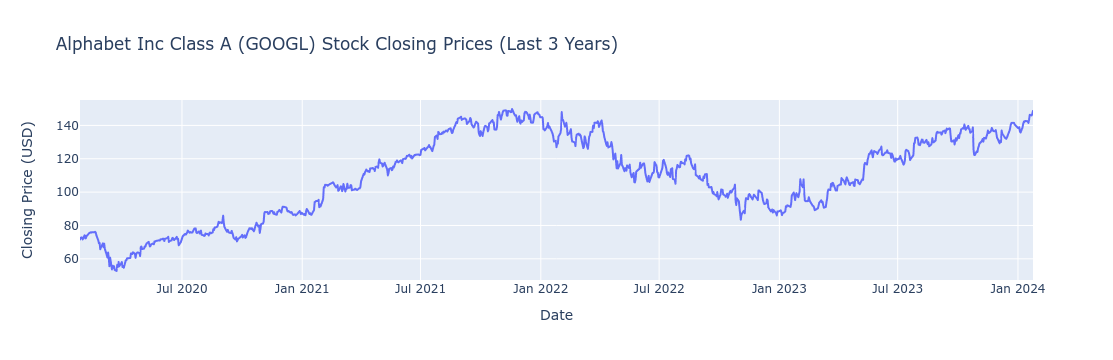

In [4]:
fig = px.line(closing_price, x='Date', y='Close', title='Alphabet Inc Class A (GOOGL) Stock Closing Prices (Last 3 Years)',
              labels={'Close': 'Closing Price (USD)', 'Date': 'Date'})

fig.show()

---
# Adding the various indicators which can be defined using **Closing Price**

In [5]:
# Trend Indicators
closing_price['MA_200'] = ta.trend.sma_indicator(closing_price['Close'], window=200)
closing_price['MACD'] = ta.trend.macd(closing_price['Close'], window_slow=26, window_fast=12)
closing_price['MACD_Signal'] = ta.trend.macd_signal(closing_price['Close'], window_slow=26, window_fast=12)
closing_price['EMA_Indicator'] = ta.trend.ema_indicator(closing_price['Close'], window=20)

# Momentum Indicators
closing_price['KAMA'] = ta.momentum.kama(closing_price['Close'], window=20)
closing_price['ROC_Indicator'] = ta.momentum.roc(closing_price['Close'], window=20)
closing_price['RSI_Indicator'] = ta.momentum.rsi(closing_price['Close'], window=20)
closing_price['StochRSI_Indicator'] = ta.momentum.stochrsi(closing_price['Close'], window=20)
closing_price['TSI'] = ta.momentum.tsi(closing_price['Close'], window_slow=26, window_fast=12)

# Volatility Indicators
closing_price['BollingerMovingAverage'] = ta.volatility.bollinger_mavg(closing_price['Close'], window=5)
closing_price['Bollinger_Upper'] = ta.volatility.bollinger_hband(closing_price['Close'], window=5)
closing_price['Bollinger_Lower'] = ta.volatility.bollinger_lband(closing_price['Close'], window=5)

In [6]:
closing_price

Date       Close     MA_200      MACD  MACD_Signal  EMA_Indicator   
0    2020-01-27   71.586502        NaN       NaN          NaN            NaN  \
1    2020-01-28   72.525002        NaN       NaN          NaN            NaN   
2    2020-01-29   72.834999        NaN       NaN          NaN            NaN   
3    2020-01-30   72.712502        NaN       NaN          NaN            NaN   
4    2020-01-31   71.639000        NaN       NaN          NaN            NaN   
...         ...         ...        ...       ...          ...            ...   
1001 2024-01-18  143.479996  127.17010  1.894708     1.659297     139.791804   
1002 2024-01-19  146.380005  127.38020  2.186269     1.764692     140.419252   
1003 2024-01-22  145.990005  127.58655  2.358675     1.883488     140.949800   
1004 2024-01-23  147.039993  127.79940  2.550630     2.016917     141.529818   
1005 2024-01-24  148.710007  128.00085  2.805176     2.174568     142.213646   

            KAMA  ROC_Indicator  RSI_Indicator  StochRSI_Indicator        TSI   
0            NaN            NaN            NaN                 NaN        NaN  \
1            NaN            NaN            NaN                 NaN        NaN   
2            NaN            NaN            NaN                 NaN        NaN   
3            NaN            NaN            NaN                 NaN        NaN   
4            NaN            NaN            NaN                 NaN        NaN   
...          ...            ...            ...                 ...        ...   
1001  138.523229       5.655370      60.839191            0.948659  19.895617   
1002  139.200717       7.120389      64.787537            1.000000  22.836281   
1003  139.639827       5.529861      63.875859            0.939147  24.736551   
1004  140.052129       4.714425      65.261214            1.000000  26.905032   
1005  140.579820       5.102835      67.357086            1.000000  29.646216   

      BollingerMovingAverage  Bollinger_Upper  Bollinger_Lower  
0                        NaN              NaN              NaN  
1                        NaN              NaN              NaN  
2                        NaN              NaN              NaN  
3                        NaN              NaN              NaN  
4                  72.259601        73.334718        71.184483  
...                      ...              ...              ...  
1001              142.434000       143.760199       141.107800  
1002              143.294000       146.634197       139.953803  
1003              143.962003       147.816217       140.107788  
1004              144.872000       149.041938       140.702062  
1005              146.320001       149.715132       142.924870  

[1006 rows x 14 columns]

## Considering the data for only the **last 3 years**

In [7]:
closing_price = closing_price.loc['2021-01-24':, :].reset_index(drop=True)

---
# Correlation Analysis (<u>**among** the indicators</u>)
---

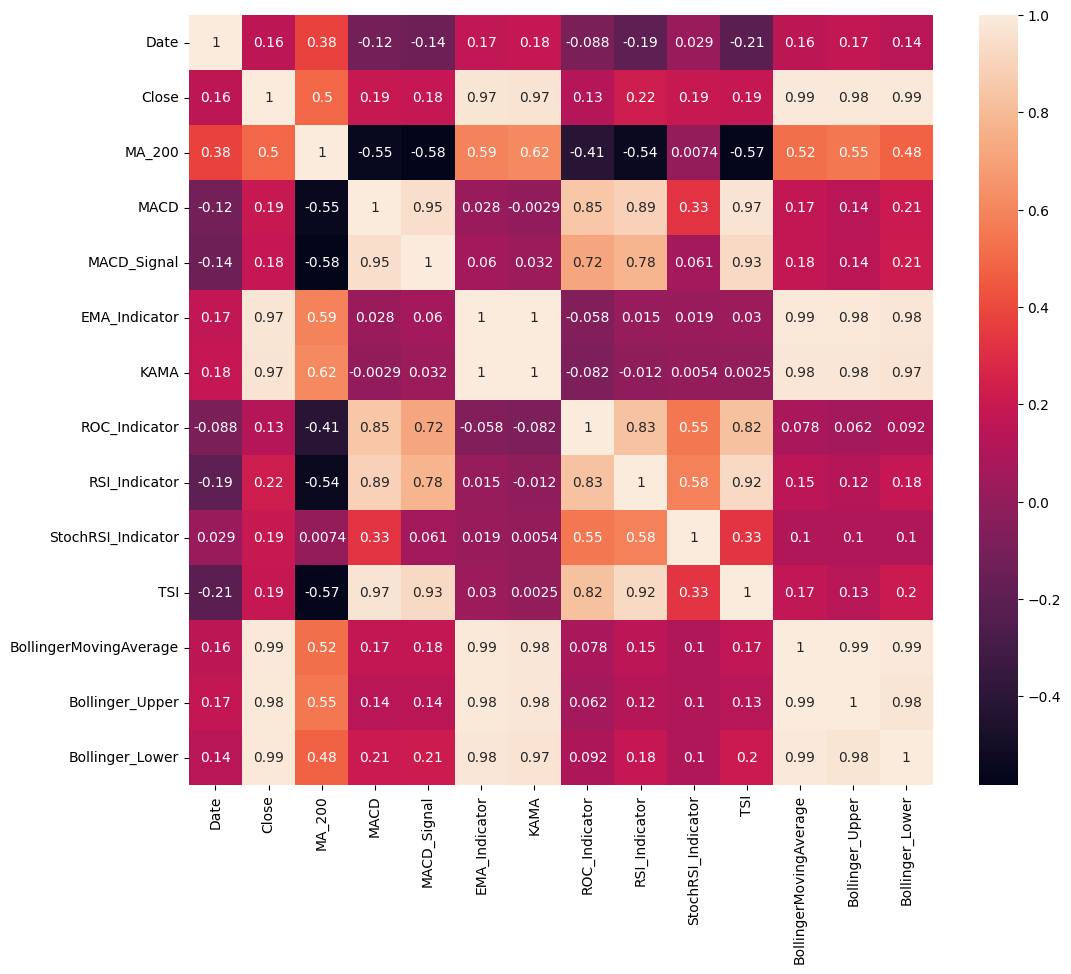

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(closing_price.corr(), annot=True)
plt.show()

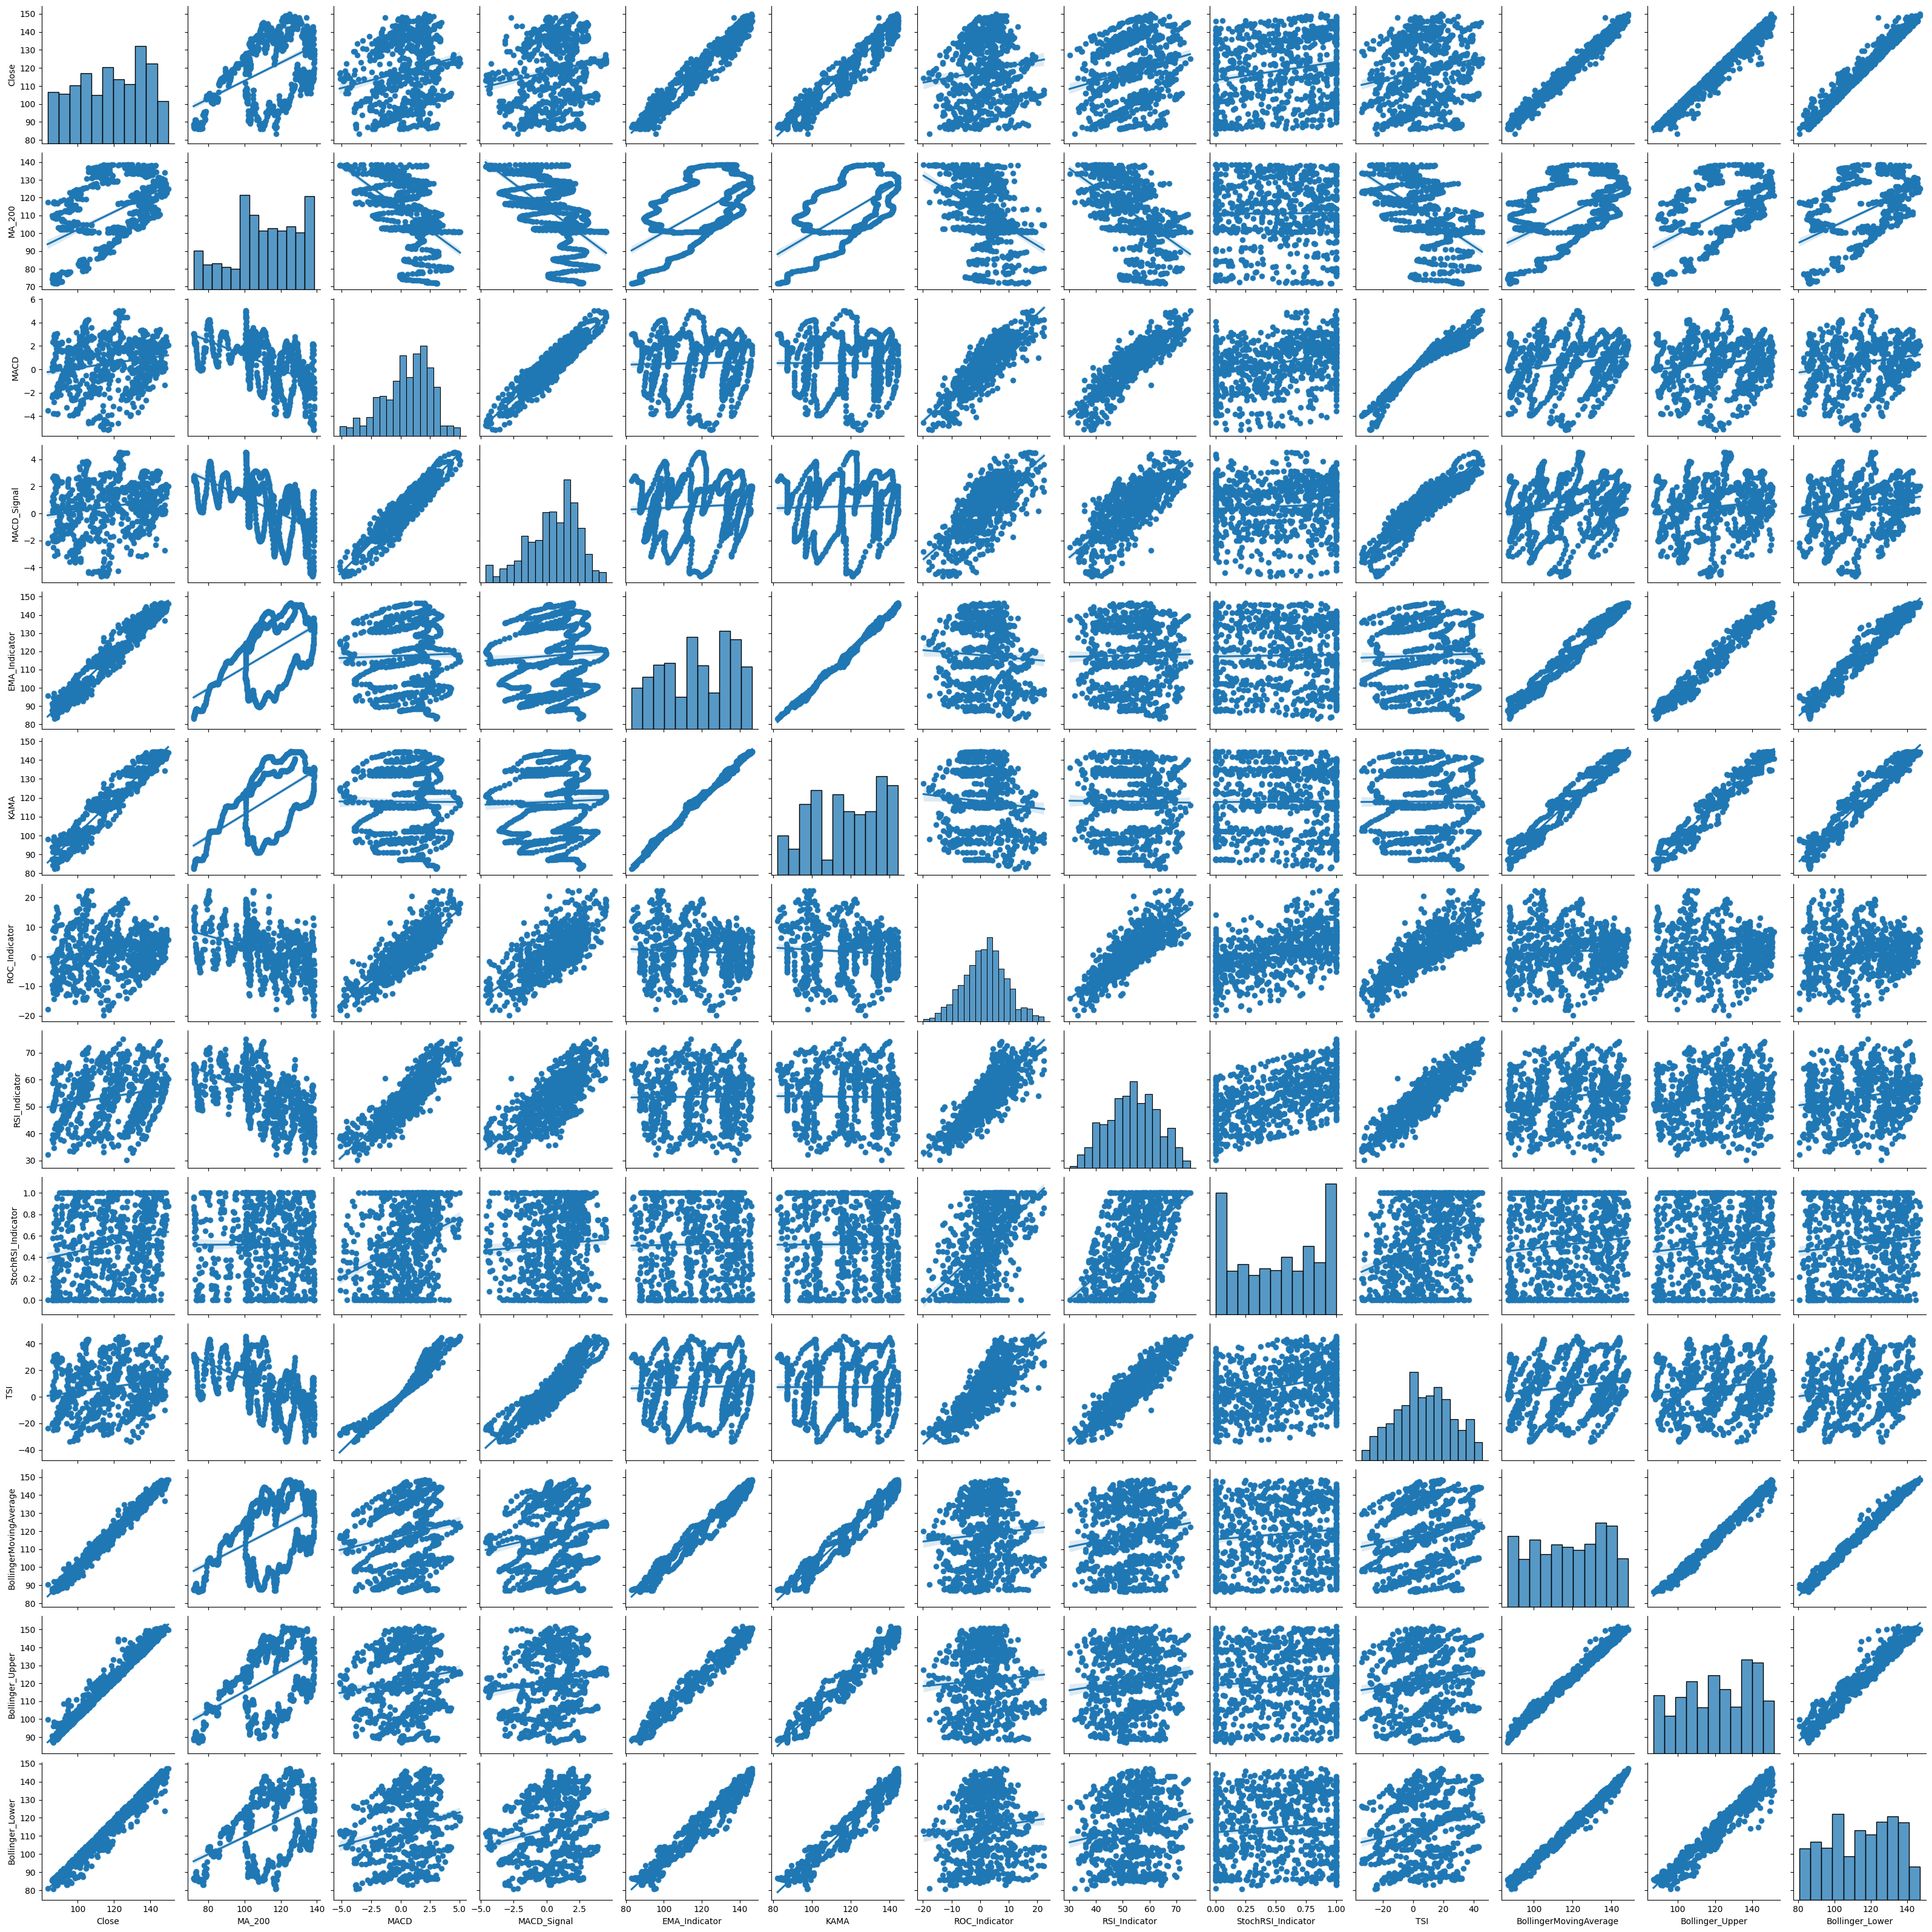

In [9]:
g = sns.pairplot(closing_price)

g.map_offdiag(sns.regplot)
plt.show()

In [10]:
def find_correlated_pairs(data, correlation_threshold):
    correlation_matrix = data.corr()

    correlated_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
                correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

    return correlated_pairs

In [11]:
correlated_pairs = find_correlated_pairs(closing_price.drop('Close', axis=1), 0.9)

In [12]:
# The following pairs of indicators which have very high correlations
correlated_pairs

[('MACD', 'MACD_Signal'),
 ('MACD', 'TSI'),
 ('MACD_Signal', 'TSI'),
 ('EMA_Indicator', 'KAMA'),
 ('EMA_Indicator', 'BollingerMovingAverage'),
 ('EMA_Indicator', 'Bollinger_Upper'),
 ('EMA_Indicator', 'Bollinger_Lower'),
 ('KAMA', 'BollingerMovingAverage'),
 ('KAMA', 'Bollinger_Upper'),
 ('KAMA', 'Bollinger_Lower'),
 ('RSI_Indicator', 'TSI'),
 ('BollingerMovingAverage', 'Bollinger_Upper'),
 ('BollingerMovingAverage', 'Bollinger_Lower'),
 ('Bollinger_Upper', 'Bollinger_Lower')]

---
# Correlation Analysis (<u>w.r.t. **Closing Price**</u>)
---

In [13]:
# The following series shows how each indicator is related to the "Closing Price"
closing_price.corr()['Close'].sort_values(ascending=False).drop('Close')

BollingerMovingAverage    0.991184
Bollinger_Lower           0.985045
Bollinger_Upper           0.984952
EMA_Indicator             0.974321
KAMA                      0.965831
MA_200                    0.498118
RSI_Indicator             0.217418
MACD                      0.194313
StochRSI_Indicator        0.192070
TSI                       0.189869
MACD_Signal               0.179242
Date                      0.155526
ROC_Indicator             0.125779
Name: Close, dtype: float64

In [14]:
closing_price['Next'] = closing_price.Close.shift(1)

---
# Exploratory Data Analysis **(for the indicators)**
---

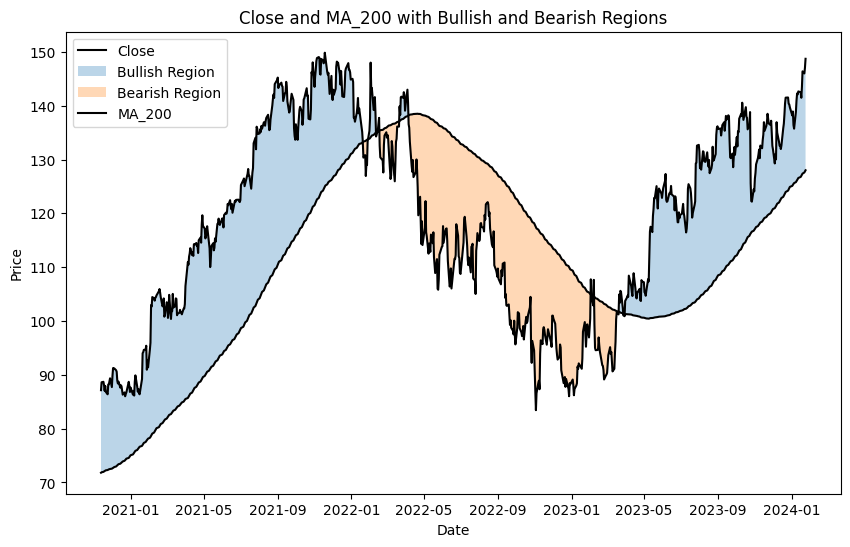

In [15]:
closing_price['Trend'] = np.where(closing_price['Close'] > closing_price['MA_200'], 'Bullish', 'Bearish')
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(closing_price['Date'], closing_price['Close'], label='Close', color='black')

ax.fill_between(closing_price['Date'], closing_price['Close'], closing_price['MA_200'], where=(closing_price['Close'] > closing_price['MA_200']),
                interpolate=True, alpha=0.3, label='Bullish Region', cmap='viridis')

ax.fill_between(closing_price['Date'], closing_price['Close'], closing_price['MA_200'], where=(closing_price['Close'] <= closing_price['MA_200']),
                interpolate=True, alpha=0.3, label='Bearish Region', cmap='viridis')
ax.plot(closing_price['Date'], closing_price['MA_200'], label='MA_200', color='black')
ax.set_title('Close and MA_200 with Bullish and Bearish Regions')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.show()

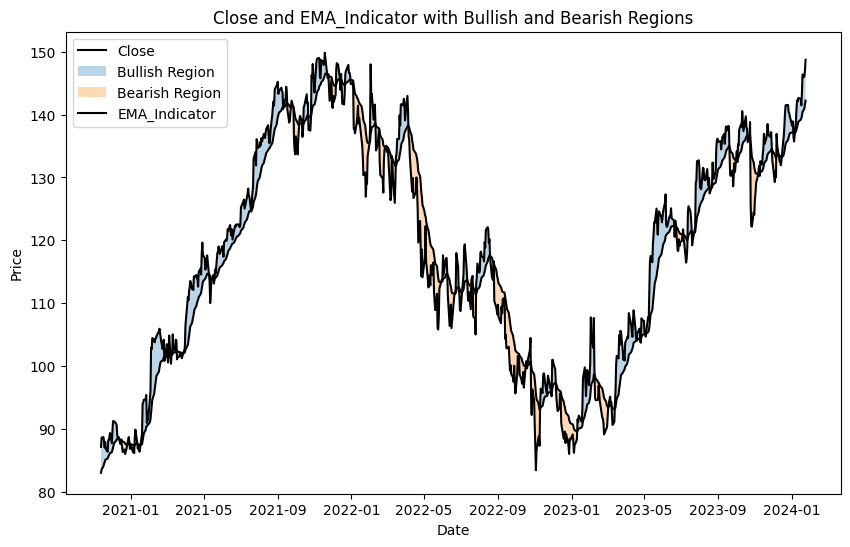

In [16]:
closing_price['Trend'] = np.where(closing_price['Close'] > closing_price['EMA_Indicator'], 'Bullish', 'Bearish')
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(closing_price['Date'], closing_price['Close'], label='Close', color='black')
ax.fill_between(closing_price['Date'], closing_price['Close'], closing_price['EMA_Indicator'], where=(closing_price['Close'] > closing_price['EMA_Indicator']),
                interpolate=True, alpha=0.3, label='Bullish Region', cmap='viridis')

ax.fill_between(closing_price['Date'], closing_price['Close'], closing_price['EMA_Indicator'], where=(closing_price['Close'] <= closing_price['EMA_Indicator']),
                interpolate=True, alpha=0.3, label='Bearish Region', cmap='viridis')
ax.plot(closing_price['Date'], closing_price['EMA_Indicator'], label='EMA_Indicator', color='black')
ax.set_title('Close and EMA_Indicator with Bullish and Bearish Regions')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.show()

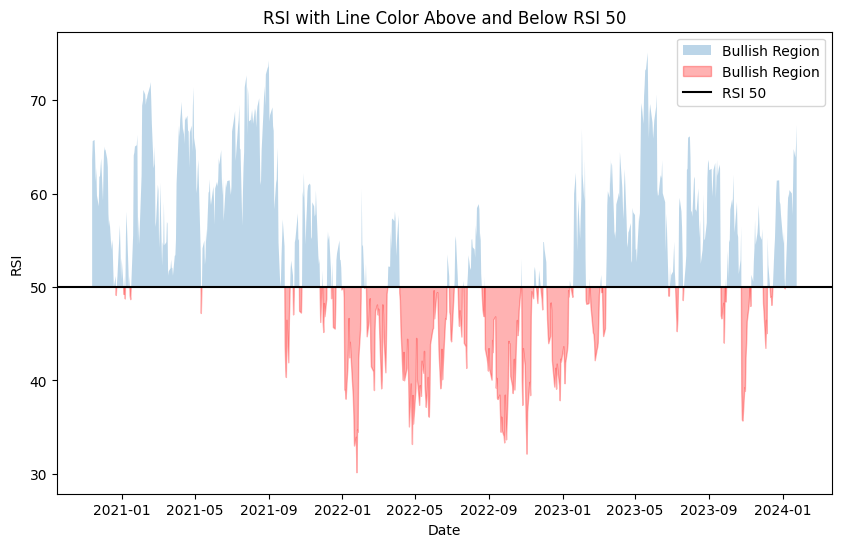

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.fill_between(closing_price['Date'], closing_price['RSI_Indicator'], 50, where=(closing_price['RSI_Indicator'] > 50),
                interpolate=True, alpha=0.3, label='Bullish Region', cmap='viridis')

ax.fill_between(closing_price['Date'], closing_price['RSI_Indicator'], 50, where=(closing_price['RSI_Indicator'] < 50),
                interpolate=True, color='red', alpha=0.3, label='Bullish Region', cmap='viridis')
ax.axhline(y=50, color='black', label='RSI 50')
ax.set_title('RSI with Line Color Above and Below RSI 50')
ax.set_xlabel('Date')
ax.set_ylabel('RSI')
plt.legend()
plt.show()

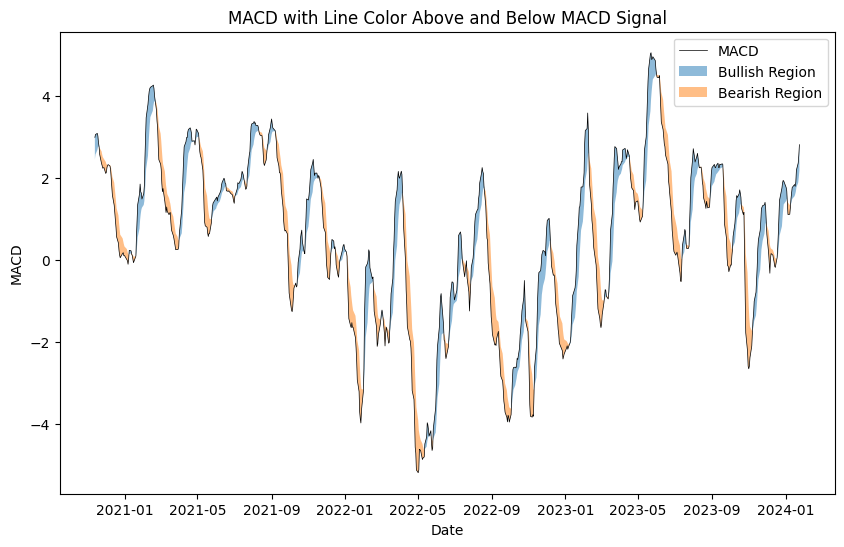

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(closing_price['Date'], closing_price['MACD'], label='MACD', color='black', linewidth=0.5)
ax.fill_between(closing_price['Date'], closing_price['MACD'], closing_price['MACD_Signal'], where=(closing_price['MACD'] > closing_price['MACD_Signal']),
                interpolate=True, alpha=0.5, label='Bullish Region', cmap='viridis')

ax.fill_between(closing_price['Date'], closing_price['MACD'], closing_price['MACD_Signal'], where=(closing_price['MACD'] < closing_price['MACD_Signal']),
                interpolate=True, alpha=0.5, label='Bearish Region', cmap='viridis')
ax.set_title('MACD with Line Color Above and Below MACD Signal')
ax.set_xlabel('Date')
ax.set_ylabel('MACD')
plt.legend()
plt.show()

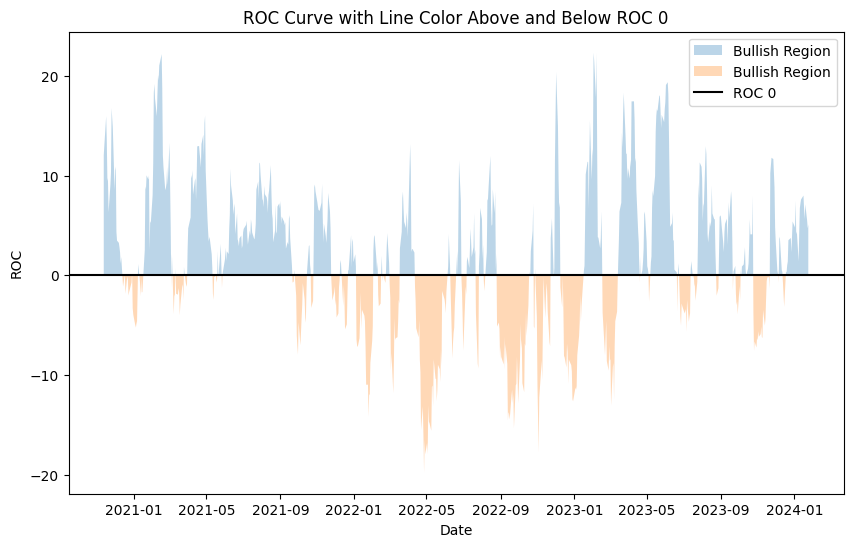

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.fill_between(closing_price['Date'], closing_price['ROC_Indicator'], 0, where=(closing_price['ROC_Indicator'] > 0),
                interpolate=True, alpha=0.3, label='Bullish Region', cmap='viridis')

ax.fill_between(closing_price['Date'], closing_price['ROC_Indicator'], 0, where=(closing_price['ROC_Indicator'] < 0),
                interpolate=True, alpha=0.3, label='Bullish Region', cmap='viridis')

ax.axhline(y=0, color='black', label='ROC 0')
ax.set_title('ROC Curve with Line Color Above and Below ROC 0')
ax.set_xlabel('Date')
ax.set_ylabel('ROC')
plt.legend()
plt.show()

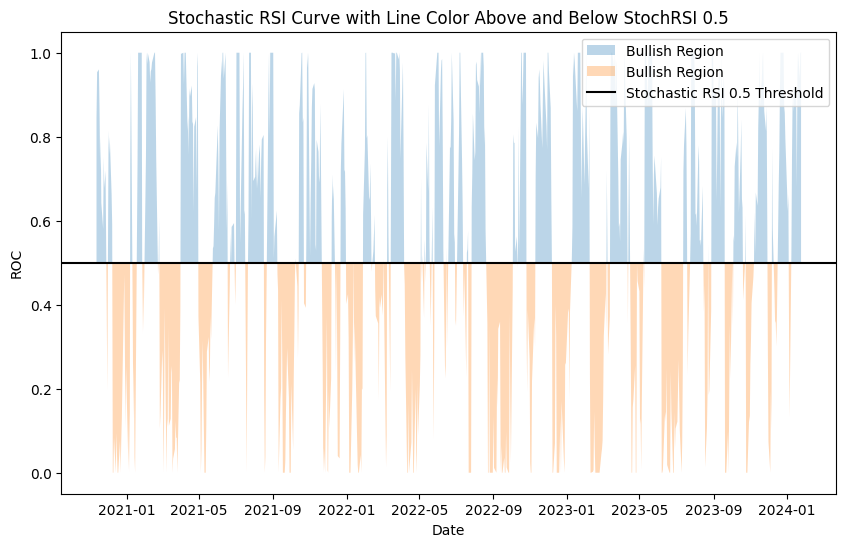

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.fill_between(closing_price['Date'], closing_price['StochRSI_Indicator'], 0.5, where=(closing_price['StochRSI_Indicator'] > 0.5),
                interpolate=True, alpha=0.3, label='Bullish Region', cmap='viridis')

ax.fill_between(closing_price['Date'], closing_price['StochRSI_Indicator'], 0.5, where=(closing_price['StochRSI_Indicator'] < 0.5),
                interpolate=True, alpha=0.3, label='Bullish Region', cmap='viridis')

ax.axhline(y=0.5, color='black', label='Stochastic RSI 0.5 Threshold')
ax.set_title('Stochastic RSI Curve with Line Color Above and Below StochRSI 0.5')
ax.set_xlabel('Date')
ax.set_ylabel('ROC')
plt.legend()
plt.show()

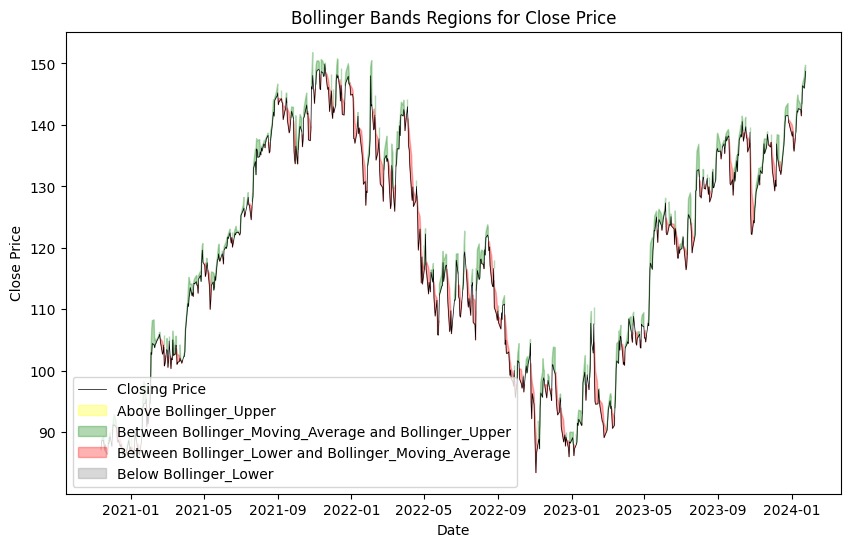

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(closing_price['Date'], closing_price['Close'], color='black', label='Closing Price', linewidth=0.5)
ax.fill_between(closing_price['Date'], closing_price['Close'], closing_price['Bollinger_Upper'],
                where=(closing_price['Close'] > closing_price['Bollinger_Upper']),
                interpolate=True, color='yellow', alpha=0.3, label='Above Bollinger_Upper')
ax.fill_between(closing_price['Date'], closing_price['Close'], closing_price['Bollinger_Upper'],
                where=(closing_price['Close'] > closing_price['BollingerMovingAverage']) &
                      (closing_price['Close'] <= closing_price['Bollinger_Upper']),
                interpolate=True, color='green', alpha=0.3, label='Between Bollinger_Moving_Average and Bollinger_Upper')
ax.fill_between(closing_price['Date'], closing_price['Close'], closing_price['BollingerMovingAverage'],
                where=(closing_price['Close'] > closing_price['Bollinger_Lower']) &
                      (closing_price['Close'] <= closing_price['BollingerMovingAverage']),
                interpolate=True, color='red', alpha=0.3, label='Between Bollinger_Lower and Bollinger_Moving_Average')
ax.fill_between(closing_price['Date'], closing_price['Close'], closing_price['BollingerMovingAverage'],
                where=(closing_price['Close'] <= closing_price['Bollinger_Lower']),
                interpolate=True, color='grey', alpha=0.3, label='Below Bollinger_Lower')
ax.set_title('Bollinger Bands Regions for Close Price')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
plt.legend()
plt.show()

---
# Checking individual performance of the indicators

In [22]:
closing_price['Ground'] = closing_price.apply(lambda row: 1 if row['Close'] > row['Next'] else -1, axis=1)

## Bollinger Bands

In [23]:
def get_bollinger_indication(row):
    close_price = row['Close']
    bollinger_upper = row['Bollinger_Upper']
    bollinger_lower = row['Bollinger_Lower']
    bollinger_middle = row['BollingerMovingAverage']

    if close_price > bollinger_upper or (close_price < bollinger_middle and close_price > bollinger_lower):
        return -1  # Bearish
    else:
        return 1

In [24]:
closing_price['bollinger_pred'] = closing_price.apply(get_bollinger_indication, axis=1)
print('Accuracy for Bollinger Bands : ' + \
      str((closing_price['Ground'] == closing_price['bollinger_pred']).sum() / (closing_price.shape[0] - 1) * 100) + '%')

Accuracy for Bollinger Bands : 75.31172069825436%


## Exponential Moving Average

In [25]:
def get_exponential_moving_average_indication(row):
    ema_20 = row['EMA_Indicator']
    close = row['Close']
    return 1 if (close > ema_20) else -1

In [26]:
closing_price['ema_pred'] = closing_price.apply(get_exponential_moving_average_indication, axis=1)
print('Accuracy for Exponential Moving Average : ' + \
      str((closing_price['Ground'] == closing_price['ema_pred']).sum() / (closing_price.shape[0] - 1) * 100) + '%')

Accuracy for Exponential Moving Average : 62.71820448877805%


## Moving Average

In [27]:
closing_price['ma_pred'] = closing_price.apply(lambda row: 1 if row['Close'] > row['MA_200'] else -1, axis=1)
print('Accuracy for Moving Average : ' + \
      str((closing_price['Ground'] == closing_price['ma_pred']).sum() / (closing_price.shape[0] - 1) * 100) + '%')

Accuracy for Moving Average : 55.36159600997507%


## Relative Strength Index

In [28]:
closing_price['rsi_pred'] = closing_price.apply(lambda row: 1 if row['RSI_Indicator'] > 50 else -1, axis=1)
print('Accuracy for Relative Strength Index : ' + \
      str((closing_price['Ground'] == closing_price['rsi_pred']).sum() / (closing_price.shape[0] - 1) * 100) + '%')

Accuracy for Relative Strength Index : 59.85037406483791%


## Moving Average Convergence Divergence

In [29]:
closing_price['macd_pred'] = closing_price.apply(lambda row: 1 if row['MACD'] > row['MACD_Signal'] else -1, axis=1)
print('Accuracy for Relative Strength Index : ' + \
      str( (closing_price['Ground'] == closing_price['macd_pred']).sum() / (closing_price.shape[0] - 1) * 100) + '%')

Accuracy for Relative Strength Index : 53.36658354114713%


## Rate of Change

In [30]:
closing_price['roc_pred'] = closing_price.apply(lambda row: 1 if row['ROC_Indicator'] > 0 else -1, axis=1)
print('Accuracy for Rate of Change : ' + \
      str( (closing_price['Ground'] == closing_price['roc_pred']).sum() / (closing_price.shape[0] - 1) * 100) + '%')

Accuracy for Rate of Change : 54.738154613466335%


## Stochastic Oscillator

In [31]:
closing_price['stochrsi_pred'] = closing_price.apply(lambda row: 1 if row['StochRSI_Indicator'] > 0.5 else -1, axis=1)
print('Accuracy for Stochastic Oscillator : ' + \
      str((closing_price['Ground'] == closing_price['stochrsi_pred']).sum() / (closing_price.shape[0] - 1) * 100) + '%')

Accuracy for Stochastic Oscillator : 61.471321695760594%


---

## Droping the indicators which have too high correlation with any other indicator or have too low correlation with "Closing Price"

In [32]:
closing_price.drop(columns=[
    'KAMA',
    'TSI',
    'EMA_Indicator',
    'StochRSI_Indicator',
    'ROC_Indicator',
], inplace=True)

In [33]:
corrlist = closing_price[['BollingerMovingAverage', 'MA_200',
       'RSI_Indicator', 'MACD', 'Close',
       ]].corr()['Close'].sort_values(ascending=False)
corrsum = np.sum(corrlist) - corrlist['Close']
corrlist = corrlist.drop('Close')

In [34]:
# Normalizing the correlation values to obtain weights
weightages = np.round(corrlist / corrlist.sum(), 2)
weightages

BollingerMovingAverage    0.52
MA_200                    0.26
RSI_Indicator             0.11
MACD                      0.10
Name: Close, dtype: float64

---
# Implementing the "Combined" Indicator
---

In [35]:
def combined_indicator(row, weightages):
    bollinger = row['bollinger_pred']
    ema = row['ema_pred']
    ma = row['ma_pred']
    rsi = row['rsi_pred']
    macd = row['macd_pred']
    stochrsi = row['stochrsi_pred']

    bullish_weight = 0
    bearish_weight = 0

    if bollinger == 1:
        bullish_weight += weightages['BollingerMovingAverage']
    else:
        bearish_weight += weightages['BollingerMovingAverage']

    if ma == 1:
        bullish_weight += weightages['MA_200']
    else:
        bearish_weight += weightages['MA_200']

    if rsi == 1:
        bullish_weight += weightages['RSI_Indicator']
    else:
        bearish_weight += weightages['RSI_Indicator']

    if macd == 1:
        bullish_weight += weightages['MACD']
    else:
        bearish_weight += weightages['MACD']

    return 1 if bullish_weight > bearish_weight else -1

In [36]:
closing_price['combined_indicator'] = closing_price.apply(combined_indicator, axis=1, weightages=weightages)

accuracy = (closing_price['Ground'] == closing_price['combined_indicator']).sum() / (closing_price.shape[0] - 1)
accuracy = np.round(accuracy, 4)

In [37]:
print(f'Accuracy of Combined Indicator: {accuracy}')

Accuracy of Combined Indicator: 0.7531


# Saving the predictions

In [38]:
closing_price['combined_indicator'] = closing_price['combined_indicator'].apply(lambda x: 'L' if x == 1 else 'S')

In [39]:
output_data = closing_price[['Close', 'combined_indicator']].rename(columns={'combined_indicator': 'Prediction'})
output_data = output_data.set_index(closing_price['Date']).loc['2021-01-24':, :]

In [40]:
output_data

Close Prediction
Date                             
2021-01-25   94.713997          L
2021-01-26   95.397499          L
2021-01-27   90.946999          S
2021-01-28   92.660004          S
2021-01-29   91.367996          S
...                ...        ...
2024-01-18  143.479996          L
2024-01-19  146.380005          L
2024-01-22  145.990005          L
2024-01-23  147.039993          L
2024-01-24  148.710007          L

[755 rows x 2 columns]

In [41]:
output_data.to_csv('Predictions_TechnicalAnalysis.csv')

---